In [1]:
from collections import defaultdict
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import numpy as np

#mport mplhep as hep
#lt.style.use(hep.style.CMS)

import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (5,4)
mpl.rcParams['figure.dpi'] = 150
mpl.rcParams["image.origin"] = 'lower'

In [2]:
dfc = pickle.load(open("../Training/global_model/df_calo.pkl","rb"))
dfc05 = pickle.load(open("../Training/global_model/df_calo_0.5.pkl","rb"))

dfc = pd.concat([dfc,dfc05])

In [3]:
ets = [0,5,10,15, 20,40,60,80,100]
etas = [0, 0.4,0.8, 1.2,1.479, 1.75,2.,2.3,2.6,3]
ncls = [0,2,3,5,10,15,20,25,30,35,50]

dfc["eta_bin"] = pd.cut(abs(dfc.seed_eta), etas, labels=list(range(len(etas)-1)))
dfc["et_bin"] = pd.cut(dfc.seed_et, ets, labels=list(range(len(ets)-1)))
dfc["ncls_bin"] = pd.cut(dfc.ncls, ncls, labels=list(range(len(ncls)-1)))

In [4]:
mask_EB_eta1 = (abs(dfc.seed_eta)<1)
mask_EB_eta2 = (abs(dfc.seed_eta)>=1) & (abs(dfc.seed_eta)<1.497)
mask_EE_eta1 = (abs(dfc.seed_eta)>=1.479) & (abs(dfc.seed_eta)<2)
mask_EE_eta2 = (abs(dfc.seed_eta)>=2) & (abs(dfc.seed_eta)<3)
masks = [mask_EB_eta1,mask_EB_eta2,mask_EE_eta1,mask_EE_eta2]

In [5]:
ets = [0,5,10,15, 20,40,60,80,100]
etas = [0, 0.4,0.8, 1.2,1.479, 1.75,2.,2.3,2.6,3]
ncls = [0,2,3,5,10,15,20,25,30,35,50]

def plot_eteta2D(data, title, zlabel="",**kwargs):

    a = data.values.reshape((len(etas)-1,len(ets)-1))

    plt.figure(figsize=(10,5))
    plt.imshow(a.T,**kwargs)
    plt.xlabel("Seed $\eta$")
    plt.ylabel("Seed $E_T$")
    plt.title(title)
    plt.colorbar(label=zlabel)

    plt.yticks(np.arange(len(ets)-1), ets)
    plt.xticks(np.arange(len(etas)-1), etas)

    locs, labels= plt.xticks()
    labels.append(etas[-1])
    locs = np.append(locs, [len(etas)-1])
    plt.xticks(locs-0.5, labels)

    locs, labels= plt.yticks()
    labels.append(ets[-1])
    locs = np.append(locs, [len(ets)-1])
    plt.yticks(locs-0.5, labels)

def plot_nclseta2D(data, title, zlabel="", **kwargs):

    a = data.values.reshape((len(etas)-1,len(ncls)-1))

    plt.figure(figsize=(10,5))
    plt.imshow(a.T, **kwargs)
    plt.xlabel("Seed $\eta$")
    plt.ylabel("N. clusters")
    plt.title(title)
    plt.colorbar(label=zlabel)

    plt.yticks(np.arange(len(ncls)-1), ncls)
    plt.xticks(np.arange(len(etas)-1), etas)

    locs, labels= plt.xticks()
    labels.append(etas[-1])
    locs = np.append(locs, [len(etas)-1])
    plt.xticks(locs-0.5, labels)

    locs, labels= plt.yticks()
    labels.append(ncls[-1])
    locs = np.append(locs, [len(ncls)-1])
    plt.yticks(locs-0.5, labels)

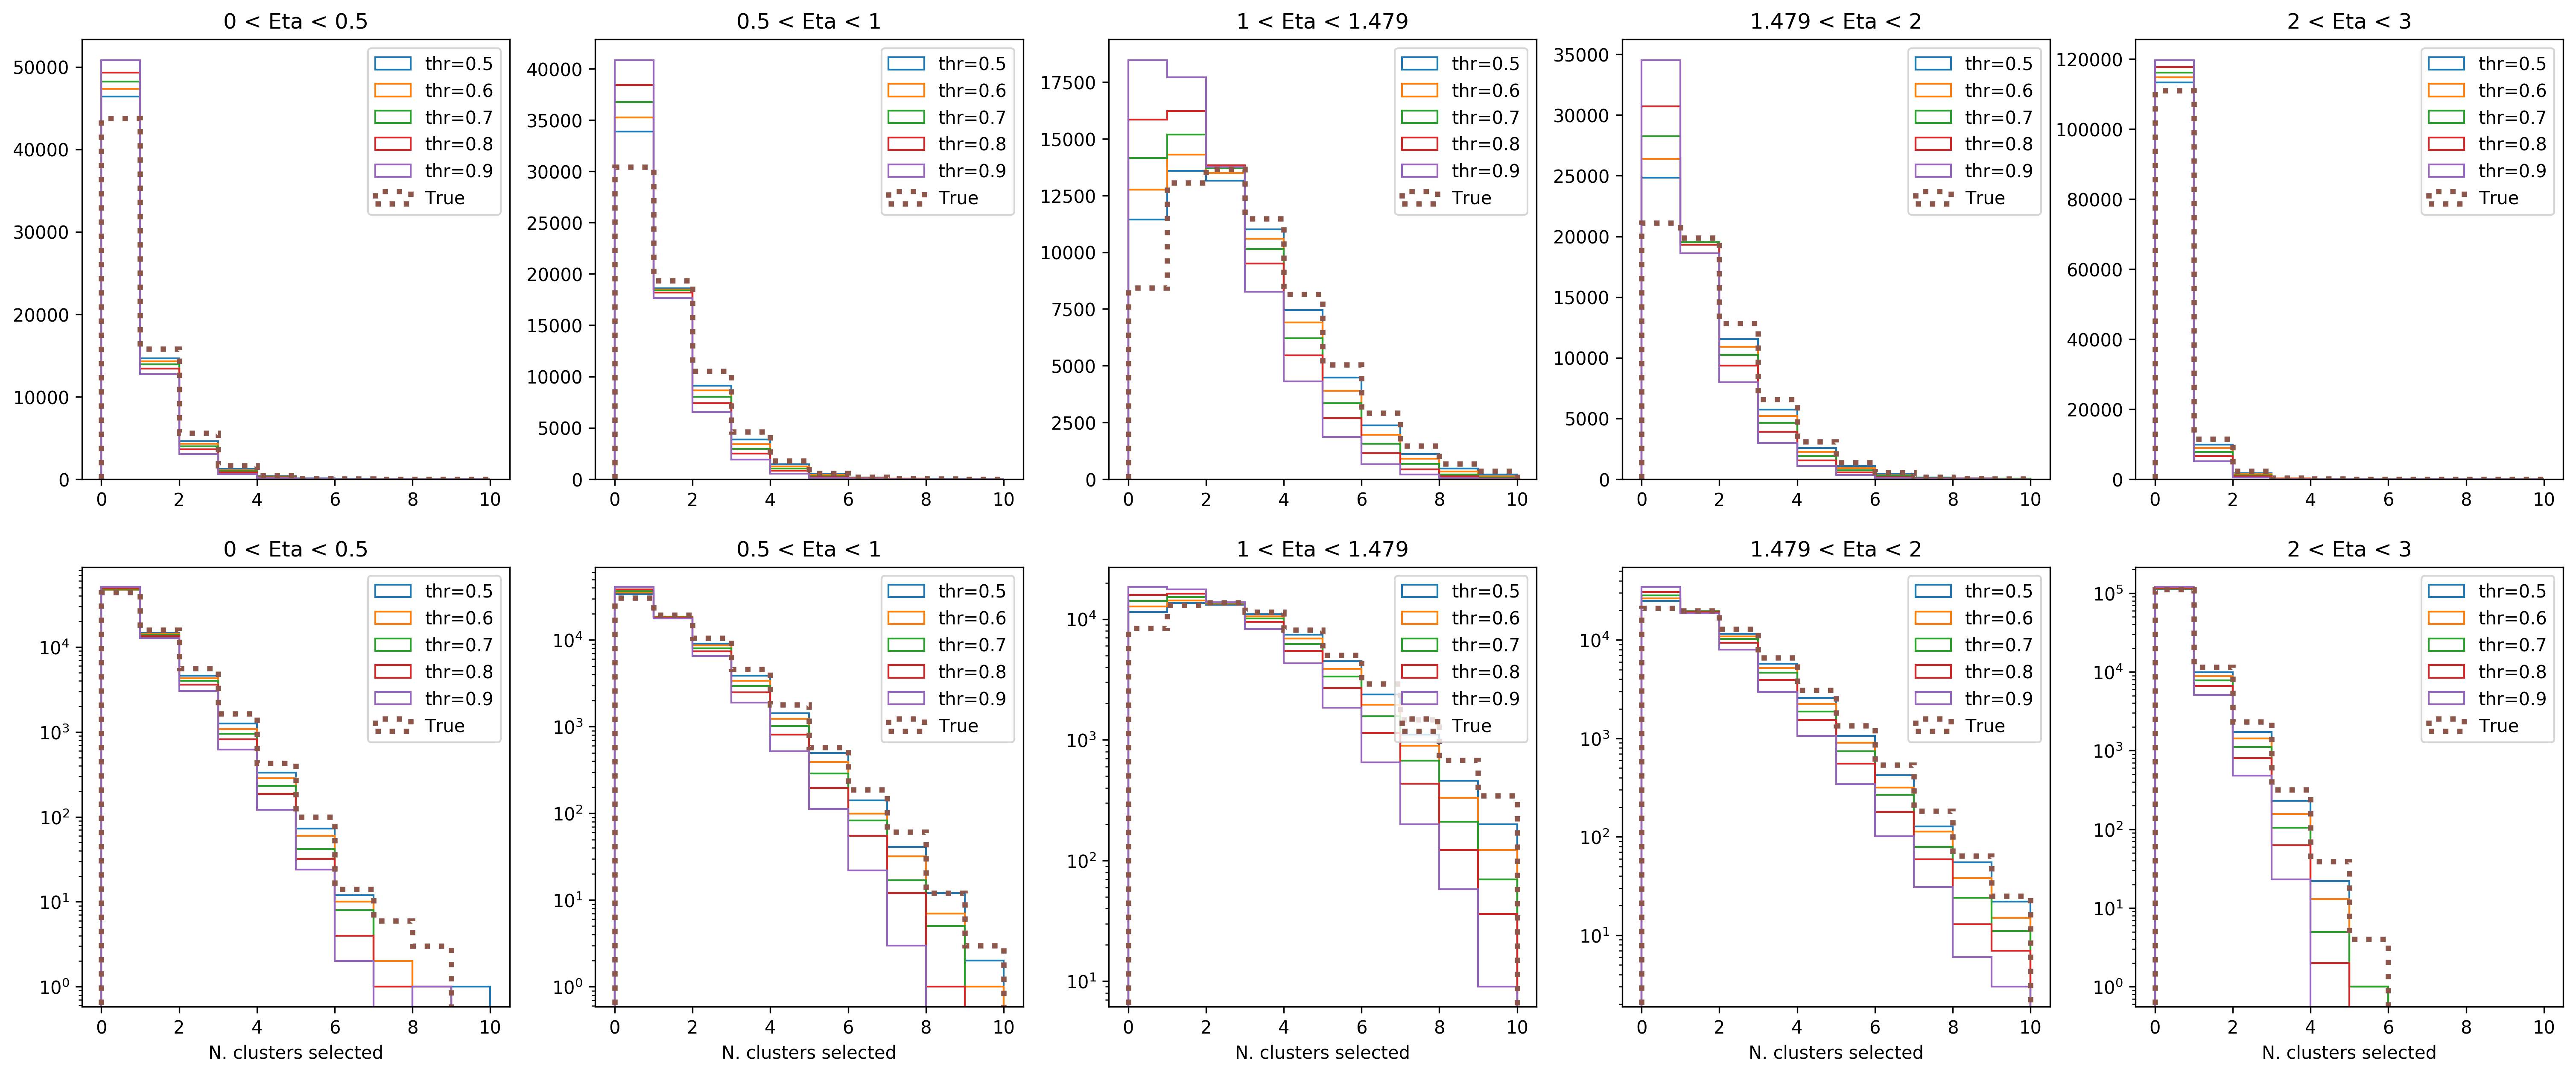

In [7]:
fig, ax = plt.subplots(2,5, figsize=(25,10),dpi=300)

etas = [ (0,0.5),(0.5,1),(1,1.479),(1.479,2), (2,3)]

for j,(e1,e2) in enumerate(etas): 
    for i, thr in enumerate([0.5, 0.6,0.7,0.8,0.9]):
        ax[0,j].hist(dfc[(dfc.thres==thr) & (abs(dfc.seed_eta)>=e1) & (abs(dfc.seed_eta)<e2)].ncls_sel,bins=10, range=(0,10),histtype='step', label='thr={}'.format(thr))
        ax[0,j].legend()
        ax[0,j].set_title('{} < Eta < {}'.format(e1,e2))   
        ax[1,j].hist(dfc[(dfc.thres==thr) & (abs(dfc.seed_eta)>=e1) & (abs(dfc.seed_eta)<e2)].ncls_sel,bins=10, range=(0,10),histtype='step', label='thr={}'.format(thr))
        
        ax[1,j].set_xlabel("N. clusters selected")
        ax[1,j].set_title('{} < Eta < {}'.format(e1,e2))  
        ax[1,j].set_yscale('log')
    ax[0,j].hist(dfc[(dfc.thres==0.6) & (abs(dfc.seed_eta)>=e1) & (abs(dfc.seed_eta)<e2)].ncls_true,bins=10, range=(0,10),histtype='step', label='True', linewidth=3,linestyle=':')
    ax[1,j].hist(dfc[(dfc.thres==0.6) & (abs(dfc.seed_eta)>=e1) & (abs(dfc.seed_eta)<e2)].ncls_true,bins=10, range=(0,10),histtype='step', label='True', linewidth=3,linestyle=':')
    ax[0,j].legend()
    ax[1,j].legend()



In [ ]:
fig, ax = plt.subplots(2,5, figsize=(25,10),dpi=300)

etas = [ (0,0.5),(0.5,1),(1,1.479),(1.479,2), (2,3)]

for j,(e1,e2) in enumerate(etas): 
    for i, thr in enumerate([0.5, 0.6,0.7,0.8,0.9]):
        ax[0,j].hist(dfc[(dfc.thres==thr) & (abs(dfc.seed_eta)>=e1) & (abs(dfc.seed_eta)<e2)].ncls_sel,bins=10, range=(0,10),histtype='step', label='thr={}'.format(thr))
        ax[0,j].legend()
        ax[0,j].set_title('{} < Eta < {}'.format(e1,e2))   
        ax[1,j].hist(dfc[(dfc.thres==thr) & (abs(dfc.seed_eta)>=e1) & (abs(dfc.seed_eta)<e2)].ncls_sel,bins=10, range=(0,10),histtype='step', label='thr={}'.format(thr))
        
        ax[1,j].set_xlabel("N. clusters selected")
        ax[1,j].set_title('{} < Eta < {}'.format(e1,e2))  
        ax[1,j].set_yscale('log')
    ax[0,j].hist(dfc[(dfc.thres==0.6) & (abs(dfc.seed_eta)>=e1) & (abs(dfc.seed_eta)<e2)].ncls_true,bins=10, range=(0,10),histtype='step', label='True', linewidth=3,linestyle=':')
    ax[1,j].hist(dfc[(dfc.thres==0.6) & (abs(dfc.seed_eta)>=e1) & (abs(dfc.seed_eta)<e2)].ncls_true,bins=10, range=(0,10),histtype='step', label='True', linewidth=3,linestyle=':')
    ax[0,j].legend()
    ax[1,j].legend()
